In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("C:/Users/Tarun Singh/OneDrive/Desktop/ML_lab1/Weather-related disease prediction.csv")

In [4]:
df.head()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


In [5]:
df.tail()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [6]:
num_rows, num_columns = df.shape

print("Training Data:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}\n")
print(f"Columns: {df.columns}")

Training Data:
Number of Rows: 5200
Number of Columns: 51

Columns: Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')


In [7]:
data_duplicates = df.duplicated().sum()
null_sum = df.isnull().sum()

print(f"Number of duplicate rows in data: {data_duplicates}")
print(f"Number of sum of null data: {null_sum}")

Number of duplicate rows in data: 219
Number of sum of null data: Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_t

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [9]:
df.describe()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5200.0,51.383269,26.625863,1.000000,30.000000,53.0000,74.00000,100.000000
Gender,5200.0,0.511731,0.499910,0.000000,0.000000,1.0000,1.00000,1.000000
Temperature (C),5200.0,19.943117,11.414905,-15.125000,12.184500,20.0175,28.46525,40.996000
Humidity,5200.0,0.744873,0.142860,0.370833,0.624479,0.7500,0.86000,1.000000
Wind Speed (km/h),5200.0,10.708818,5.686331,0.008000,6.414508,10.1525,15.06155,31.303096
nausea,5200.0,0.155385,0.362306,0.000000,0.000000,0.0000,0.00000,1.000000
joint_pain,5200.0,0.065769,0.247902,0.000000,0.000000,0.0000,0.00000,1.000000
abdominal_pain,5200.0,0.040000,0.195978,0.000000,0.000000,0.0000,0.00000,1.000000
high_fever,5200.0,0.101731,0.302323,0.000000,0.000000,0.0000,0.00000,1.000000
chills,5200.0,0.062885,0.242779,0.000000,0.000000,0.0000,0.00000,1.000000


In [11]:
print(df)

      Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0       4       1        25.826000  0.740000           8.289000       1   
1      55       0        21.628000  0.600000          15.236000       0   
2      45       0        13.800000  0.817083           4.291992       0   
3       6       0        37.254000  0.610000          18.009000       1   
4      70       0        18.162000  0.870000          17.916000       0   
...   ...     ...              ...       ...                ...     ...   
5195   91       1        21.714000  0.870000           5.450000       0   
5196   83       0        10.491000  0.920000           9.165000       0   
5197   77       0        19.942824  0.744583           9.305129       0   
5198   84       0        20.069000  0.850000          17.971000       0   
5199  100       1        38.021000  0.750000          18.300000       0   

      joint_pain  abdominal_pain  high_fever  chills  ...  facial_pain  \
0              0         

In [12]:
df['prognosis'].value_counts()

prognosis
Heart Attack    1013
Migraine         941
Influenza        658
Heat Stroke      338
Malaria          330
Stroke           329
Eczema           327
Dengue           322
Common Cold      321
Arthritis        311
Sinusitis        310
Name: count, dtype: int64

In [13]:
unique_diseases = df.iloc[:,-1].unique()
unique_diseases

array(['Heart Attack', 'Influenza', 'Dengue', 'Sinusitis', 'Eczema',
       'Common Cold', 'Heat Stroke', 'Migraine', 'Malaria', 'Arthritis',
       'Stroke'], dtype=object)

C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_30440\993915957.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group','prognosis'])
C:\Users\Tarun Singh\AppData\Local\Temp\ipykernel_30440\993915957.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_group')


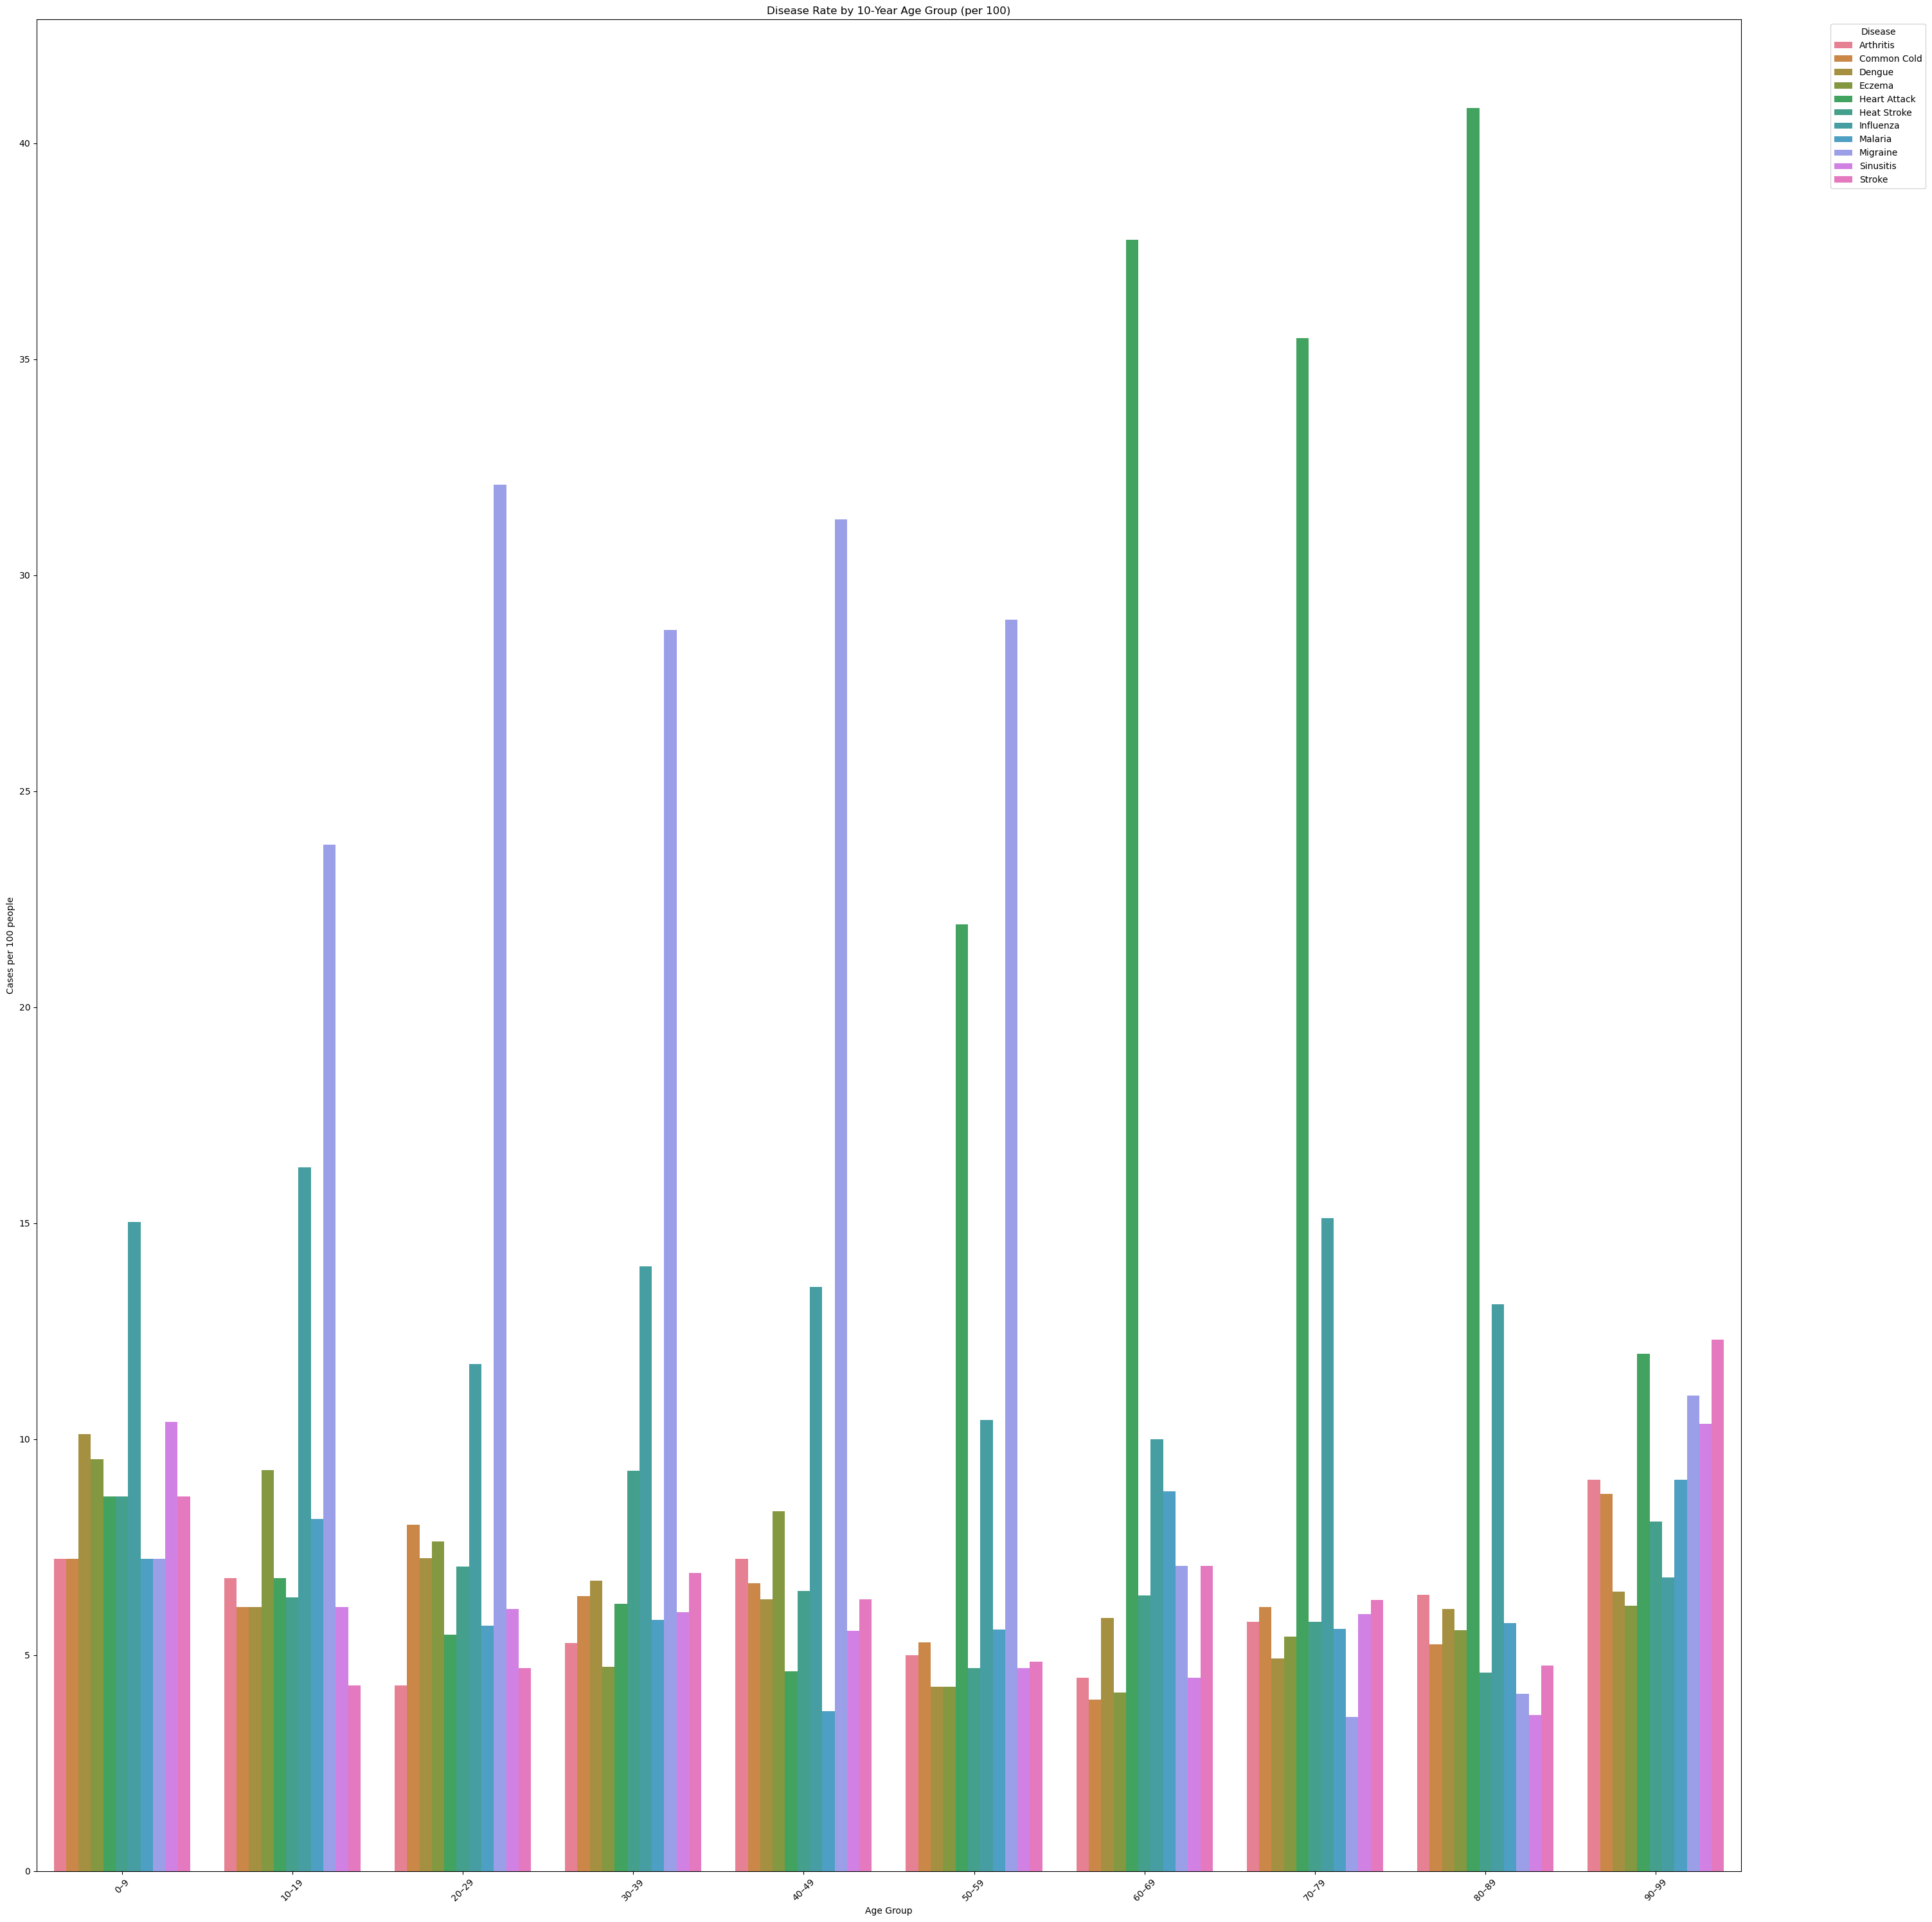

In [14]:
# 1) Re‑bin your ages (you already have this part)
bins   = list(range(0, 101, 10))
labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['age_group'] = df['age_group'].cat.set_categories(labels, ordered=True)

# 2) Compute raw counts per (age_group, disease)
counts = (
    df
    .groupby(['age_group','prognosis'])
    .size()
    .reset_index(name='count')
)

# 3) Compute total cases *in each age_group*
totals = (
    df
    .groupby('age_group')
    .size()
    .reset_index(name='total')
)

# 4) Merge them & compute rate “per 100 people in that bin”
counts = counts.merge(totals, on='age_group')
counts['per_100'] = counts['count'] / counts['total'] * 100

# 5) Plot those rates
plt.figure(figsize=(30,30))
sns.barplot(
    data=counts,
    x='age_group',
    y='per_100',
    hue='prognosis'
)
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Cases per 100 people')
plt.title ('Disease Rate by 10‑Year Age Group (per 100)')
plt.legend(title='Disease', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0–9'),
  Text(1, 0, '10–19'),
  Text(2, 0, '20–29'),
  Text(3, 0, '30–39'),
  Text(4, 0, '40–49'),
  Text(5, 0, '50–59'),
  Text(6, 0, '60–69'),
  Text(7, 0, '70–79'),
  Text(8, 0, '80–89'),
  Text(9, 0, '90–99')])

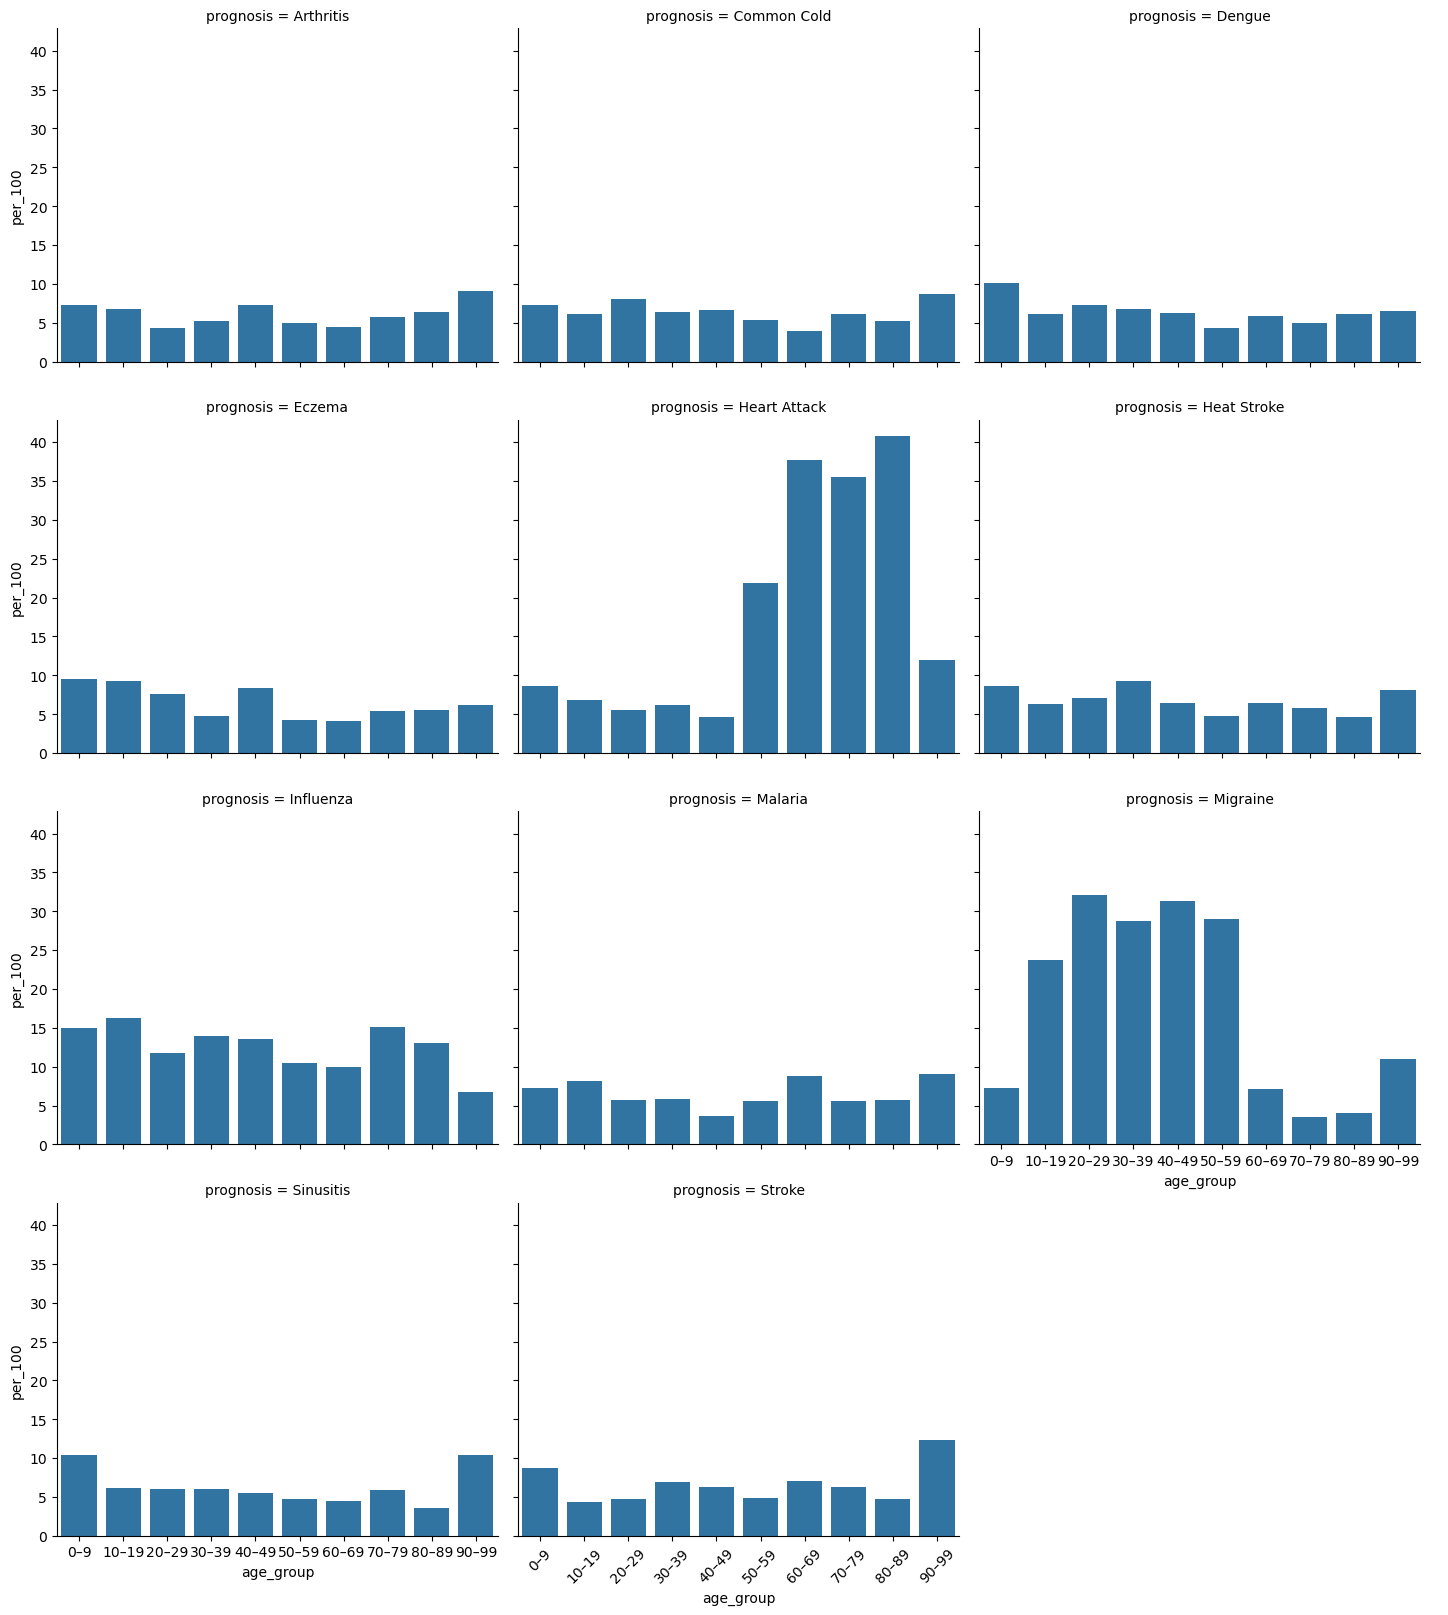

In [15]:
sns.catplot(
    data=counts,
    x='age_group',
    y='per_100',
    col='prognosis',
    kind='bar',
    col_wrap=3,        # adjust how many columns of small multiples
    height=4,
    aspect=1.2
)
plt.xticks(rotation=45)

In [16]:
# Bin weather variables for categorical analysis
df['temp_bin'] = pd.cut(df['Temperature (C)'], bins=[0, 20, 25, 30, 35, 100], labels=['<20°C', '20-25°C', '25-30°C', '30-35°C', '>35°C'])
df['humidity_bin'] = pd.cut(df['Humidity'], bins=[0, 30, 50, 70, 100], labels=['Low', 'Medium', 'High', 'Very High'])
df['wind_bin'] = pd.cut(df['Wind Speed (km/h)'], bins=[0, 10, 20, 30, 100], labels=['Low', 'Medium', 'High', 'Very High'])

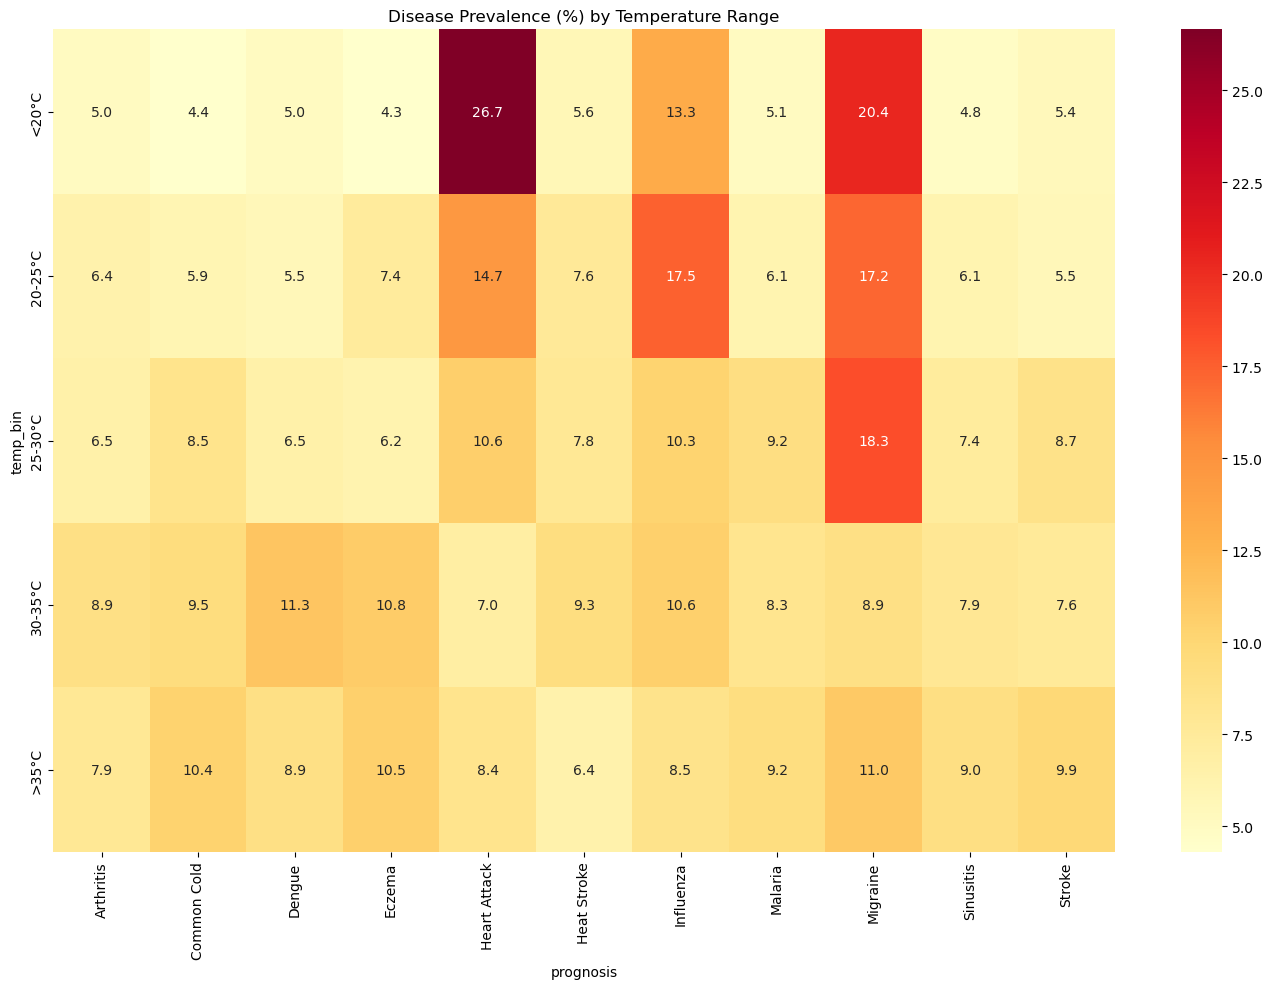

In [17]:
plt.figure(figsize=(14, 10))
temp_disease = pd.crosstab(df['temp_bin'], df['prognosis'], normalize='index') * 100
sns.heatmap(temp_disease, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Disease Prevalence (%) by Temperature Range')
plt.tight_layout()
plt.show()

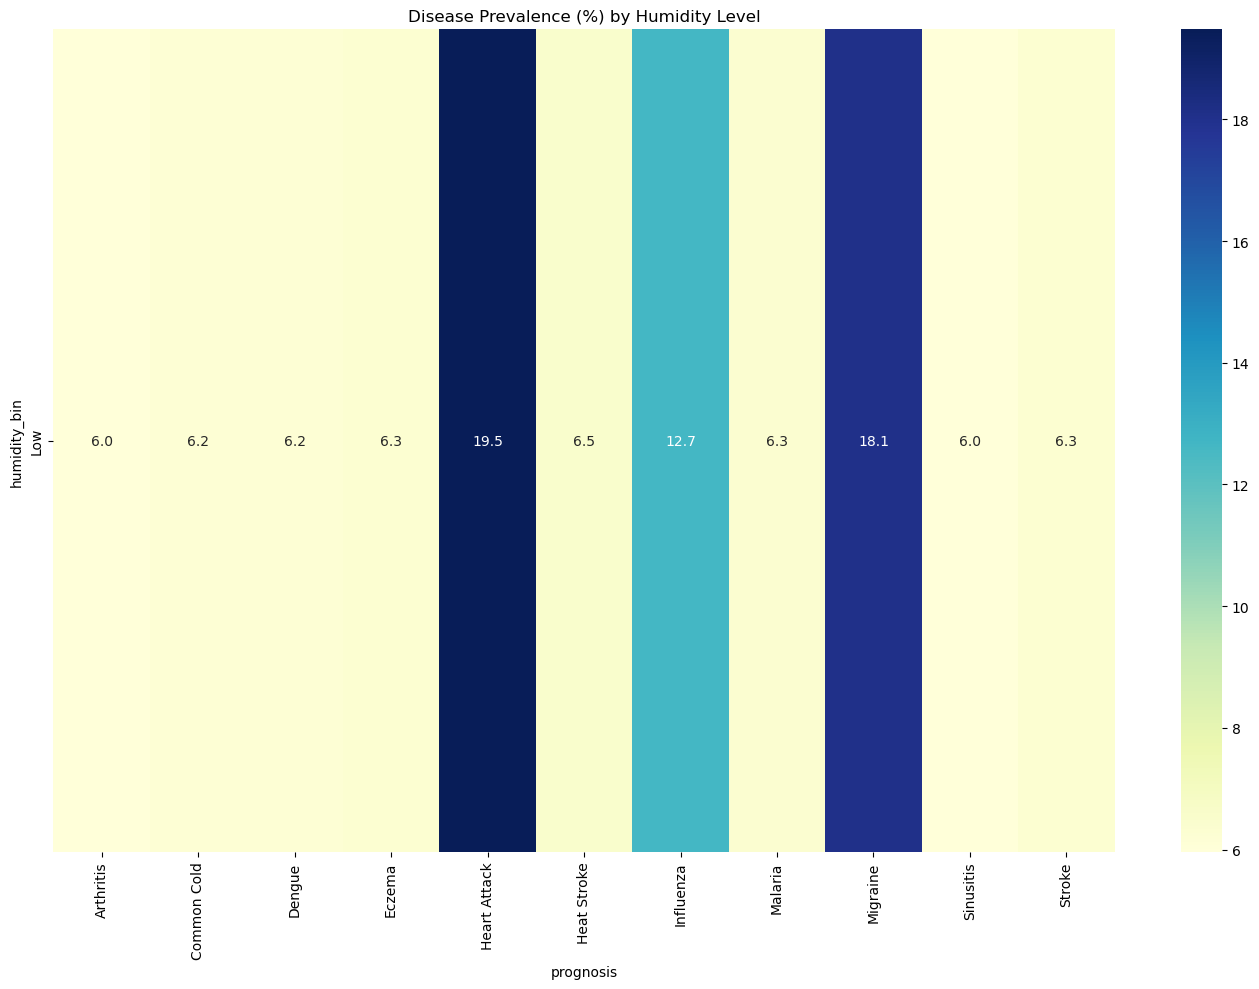

In [18]:
plt.figure(figsize=(14, 10))
humidity_disease = pd.crosstab(df['humidity_bin'], df['prognosis'], normalize='index') * 100
sns.heatmap(humidity_disease, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Disease Prevalence (%) by Humidity Level')
plt.tight_layout()
plt.show()

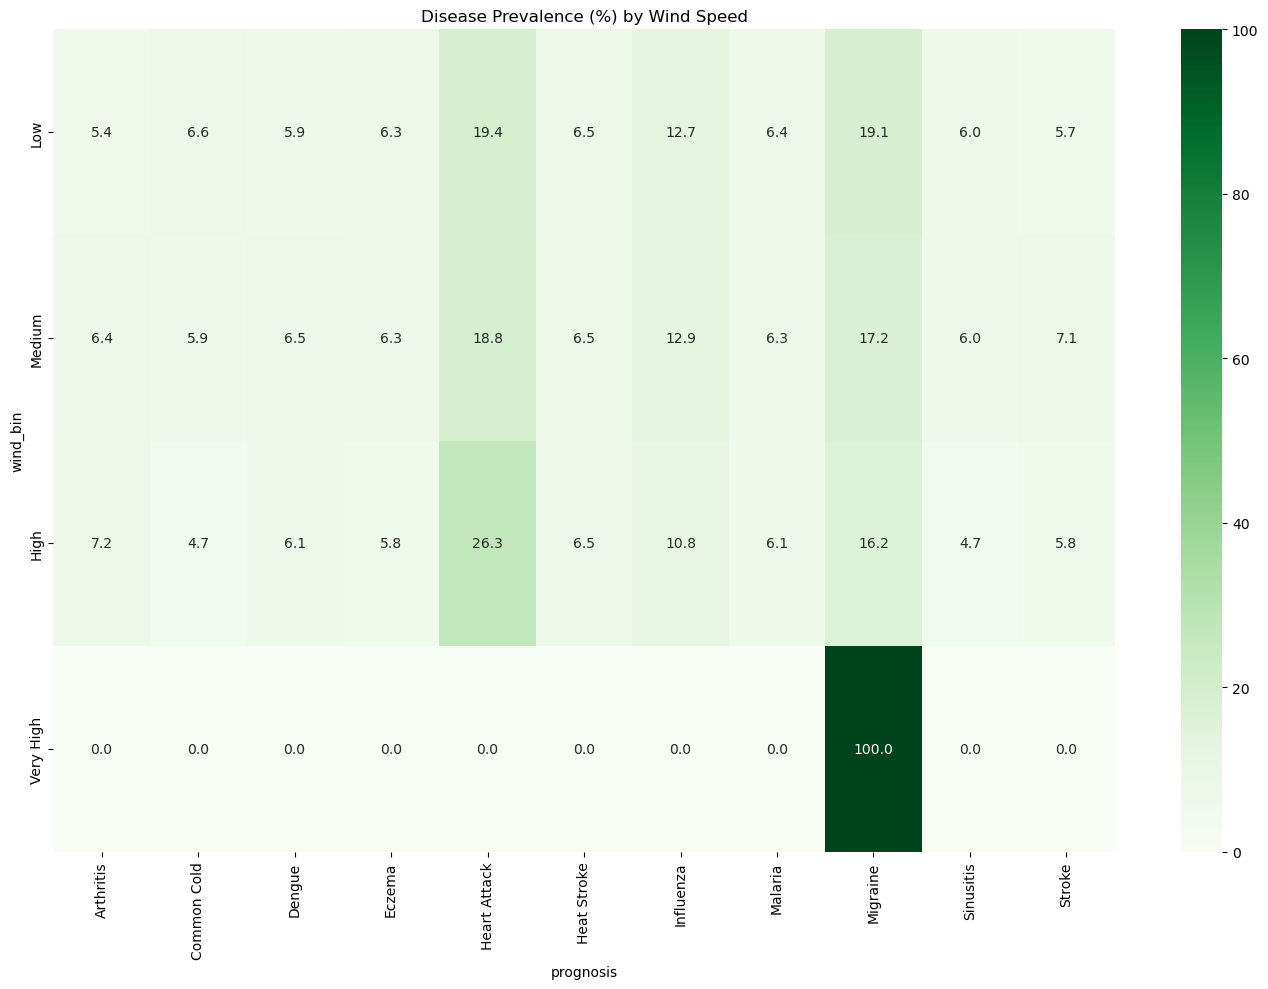

In [19]:
plt.figure(figsize=(14, 10))
wind_disease = pd.crosstab(df['wind_bin'], df['prognosis'], normalize='index') * 100
sns.heatmap(wind_disease, annot=True, fmt='.1f', cmap='Greens')
plt.title('Disease Prevalence (%) by Wind Speed')
plt.tight_layout()
plt.show()

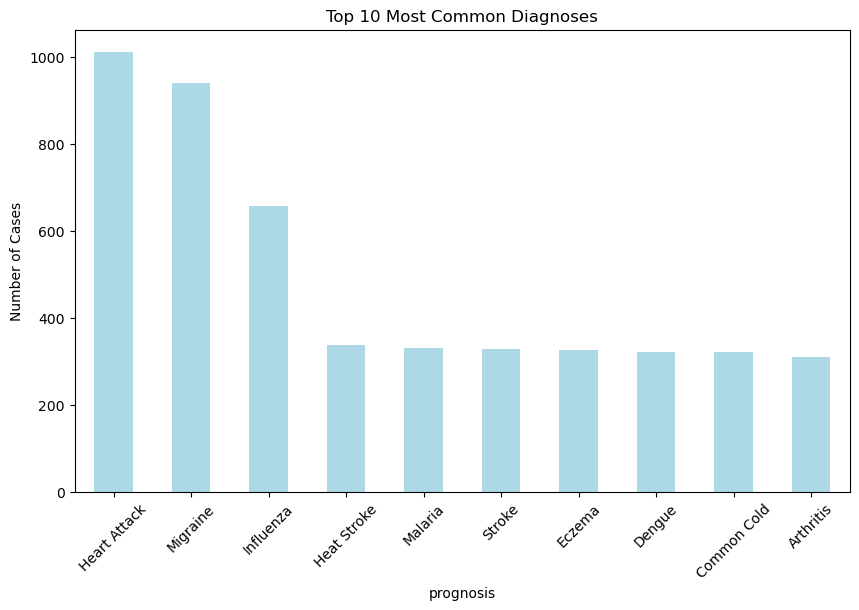

In [20]:
plt.figure(figsize=(10,6))
df['prognosis'].value_counts().head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Most Common Diagnoses')
plt.ylabel('Number of Cases')
plt.xticks(rotation = 45)
plt.show()

In [24]:
# Encode 'prognosis' column
label_encoder = LabelEncoder()
df['prognosis_encoded'] = label_encoder.fit_transform(df['prognosis'])

print("\nOriginal 'prognosis' column and its new 'prognosis_encoded' values (first 10 rows):")
print(df[['prognosis', 'prognosis_encoded']].head(10))

print("\n--- Mapping of 'prognosis' categories to numerical labels ---")
for i, category in enumerate(label_encoder.classes_):
    print(f"'{category}' : {i}")

print("\nValue counts for the 'prognosis_encoded' column:")
print(df['prognosis_encoded'].value_counts().sort_index())

# Drop duplicates
df = df.drop_duplicates()

X = df.drop(["prognosis", "prognosis_encoded", 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)'], axis=1)
y = df['prognosis_encoded'] # Use the encoded target variable

# Convert categorical bin columns to numerical using pd.factorize
for col in ['age_group', 'temp_bin', 'humidity_bin', 'wind_bin']:
    X[col] = pd.factorize(X[col])[0]



Original 'prognosis' column and its new 'prognosis_encoded' values (first 10 rows):
      prognosis  prognosis_encoded
0  Heart Attack                  4
1     Influenza                  6
2     Influenza                  6
3        Dengue                  2
4     Sinusitis                  9
5     Sinusitis                  9
6  Heart Attack                  4
7        Eczema                  3
8  Heart Attack                  4
9   Common Cold                  1

--- Mapping of 'prognosis' categories to numerical labels ---
'Arthritis' : 0
'Common Cold' : 1
'Dengue' : 2
'Eczema' : 3
'Heart Attack' : 4
'Heat Stroke' : 5
'Influenza' : 6
'Malaria' : 7
'Migraine' : 8
'Sinusitis' : 9
'Stroke' : 10

Value counts for the 'prognosis_encoded' column:
prognosis_encoded
0     301
1     309
2     308
3     311
4     968
5     323
6     632
7     319
8     897
9     301
10    312
Name: count, dtype: int64


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=10)
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [28]:
# Prediciting and Evaluating
y_pred = model.predict(X_test)

In [30]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9829683698296837

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       0.85      1.00      0.92        89
           2       0.99      0.96      0.97        97
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00       317
           5       0.99      0.98      0.98        97
           6       1.00      0.94      0.97       228
           7       0.98      0.98      0.98       120
           8       0.98      1.00      0.99       292
           9       1.00      0.99      1.00       105
          10       0.99      0.96      0.97       100

    accuracy                           0.98      1644
   macro avg       0.98      0.98      0.98      1644
weighted avg       0.98      0.98      0.98      1644



In [32]:
# Saving the Trained model
import joblib

filename = 'weather_disease_model.pkl'
joblib.dump(model, filename)

print(f"Model saved as {filename}")

Model saved as weather_disease_model.pkl
